In [1]:
%reset
%matplotlib inline

import netCDF4 as nc
import cmocean
import numpy as np
import xarray as xr
import xrft
from xgcm import Grid
import matplotlib.pyplot as plt
import scipy.interpolate
from dask.diagnostics import ProgressBar
from matplotlib import colors, ticker
import pandas as pd

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [2]:
%cd /glade/p/univ/unyu0004/neerajab/NeverWorld2/
#run=20 #1/4 degree NeverWorld2 setup
run=28 #1/16 degree NeverWorld2 setup
fs=xr.open_dataset('run%i/static.nc' % (run), decode_times=False)
os=xr.open_dataset('run%i/ocean.stats.nc' % (run), decode_times=False)
forcing=xr.open_dataset('run%i/forcing_00000500.nc' % (run), decode_times=False)
tau = 500*86400
end_time = 30500
start_time = end_time - tau/86400

#av1     = xr.open_dataset('run%i/averages_00030002.nc' % (run), decode_times=False)  #5-day average
#av2     = xr.open_dataset('run%i/averages_00030502.nc' % (run), decode_times=False)  #5-day average
av     = xr.open_dataset('run%i/averages_000%i.nc' % (run, end_time-500+2), decode_times=False)  #5-day average
%cd /glade/p/univ/unyu0004/eyankovsky/NeverWorld_analysis/
#print(os)
plt.rcParams.update({'font.size': 18})

/glade/p/univ/unyu0004/neerajab/NeverWorld2
/glade/p/univ/unyu0004/eyankovsky/NeverWorld_analysis


In [100]:
%cd /glade/p/univ/unyu0004/neerajab/NeverWorld2/run33
run=33; factor = 1440/86400 #1/32 degree NeverWorld setup
fs=xr.open_dataset('static.nc', decode_times=False)
os=xr.open_dataset('ocean.stats.nc', decode_times=False)
forcing=xr.open_dataset('forcing_00002000.nc', decode_times=False)
init=xr.open_dataset('MOM_IC.nc', decode_times=False)
av=xr.open_dataset('averages_00001902.nc',decode_times=False)
#av=xr.open_mfdataset(['averages_00001502.nc','averages_00001602.nc', 'averages_00001702.nc', 'averages_00001802.nc', 'averages_00001902.nc'],decode_times=False,combine='by_coords')
# print(av)
%cd /glade/p/univ/unyu0004/eyankovsky/NeverWorld_analysis/

/glade/scratch/gmarques/NW2_TMP/run33
/glade/p/univ/unyu0004/eyankovsky/NeverWorld_analysis


In [3]:
lat= (av.yh)     
lon= (av.xh)     

u= av.u[:,0,:,:]-(av.u[:,0,:,:].mean('time')); print('done')#We're removing the temporally-averaged mean flow.
v= av.v[:,0,:,:]-(av.v[:,0,:,:].mean('time'))

#u= xr.concat([av1.u[:,0,:,:],av2.u[:,0,:,:]],dim='time');#-(av.u[:,0,:,:].mean('time')) #We're removing the temporally-averaged mean flow.
#v= xr.concat([av1.v[:,0,:,:],av2.v[:,0,:,:]],dim='time');#-(av.v[:,0,:,:].mean('time'))
Ld = av.Rd1[:].mean('time')
grid= Grid(av, coords={'X': {'center': 'xh', 'outer': 'xq'}, #This tells the grid where xh, xq, yh, and yq are defined.
                        'Y': {'center': 'yh', 'outer': 'yq'}});
#Interpolating u,v to be on the same grid points:
dx= grid.interp(fs.dxCu,axis='X')
dy= grid.interp(fs.dyCv,axis='Y')
u = grid.interp(u,axis='X')
v = grid.interp(v,axis='Y')
print(u.shape,v.shape)
Ld = av.Rd1[:].mean('time')

done
(100, 2240, 960) (100, 2240, 960)


In [4]:
print('min dx:',2*np.pi*6378000*np.cos(70*np.pi/180)/360/16,'km')
print('max dx:',2*np.pi*6378000/360/16,'km')

min dx: 2379.543149457715 km
max dx: 6957.318730762397 km


In [5]:
u

<xarray.DataArray (time: 100, yh: 2240, xh: 960)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * time     (time) float64 3e+04 3.001e+04 3.001e+04 ... 3.049e+04 3.05e+04
  * yh       (yh) float64 -69.97 -69.91 -69.84 -69.78 ... 69.84 69.91 69.97
  * xh       (xh) float64 0.03125 0.09375 0.1562 0.2188 ... 59.84 59.91 59.97

/glade/work/eyankovsky/my_npl_clone/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  from ipykernel import kernelapp as app


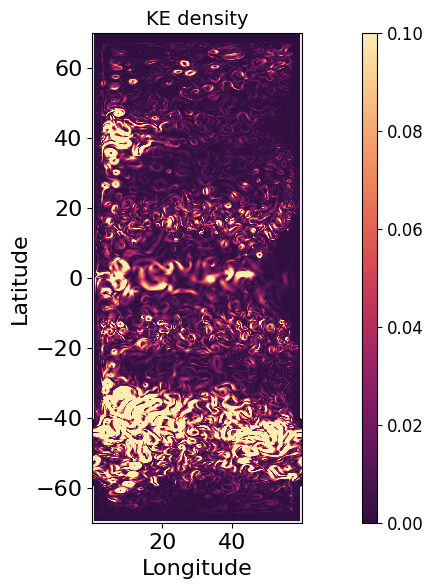

In [67]:
#Plotting KE for whole domain
fig = plt.figure(figsize=(5, 7), dpi=100, facecolor='w', edgecolor='k')
ax1 = fig.add_axes([0.15,0.2,0.6,0.7]) 
ax2 = fig.add_axes([.78, 0.2, 0.03, 0.7])
ax1.set_facecolor((0.92, 0.92, 0.92))
ax1.set_xlabel('Longitude',fontsize=16)
ax1.set_ylabel('Latitude',fontsize=16)
ax1.tick_params(labelsize=16); 
ax2.tick_params(labelsize=14)


ax1.set_title('KE density',fontsize=14)

KE=(u**2+v**2)*0.5
plotted =ax1.pcolor(lon,lat,KE[-1,:],cmap=cmocean.cm.matter_r,vmin=0,vmax=1e-1)
ax1.set_aspect('equal', 'box')
cbar = plt.colorbar(mappable=plotted, cax=ax2, orientation = 'vertical');
cbar.ax.tick_params(labelsize=12);
#ax2.set_title('$log_{10}(KE)$')
#
plt.show()

In [68]:
dx.shape

(2240, 960)

In [69]:
dx.shape

(2240, 960)

In [6]:
## Concatenate together the region from 10 to 50 degrees longitude 5 times
uconc=xr.concat([u[-5,:,160:-160],u[-4,:,160:-160].assign_coords(xh=u[-3,:,160:-160].xh+40),u[-3,:,160:-160].assign_coords(xh=u[-3,:,160:-160].xh+80),u[-2,:,160:-160].assign_coords(xh=u[-2,:,160:-160].xh+120),u[-1,:,160:-160].assign_coords(xh=u[-1,:,160:-160].xh+160)],dim='xh')
vconc=xr.concat([v[-5,:,160:-160],v[-4,:,160:-160].assign_coords(xh=v[-3,:,160:-160].xh+40),v[-3,:,160:-160].assign_coords(xh=v[-3,:,160:-160].xh+80),v[-2,:,160:-160].assign_coords(xh=v[-2,:,160:-160].xh+120),v[-1,:,160:-160].assign_coords(xh=v[-1,:,160:-160].xh+160)],dim='xh')

dxconc=xr.concat([dx[:,160:-160],dx[:,160:-160],dx[:,160:-160],dx[:,160:-160],dx[:,160:-160]],dim='xh')

In [7]:
dxconc

<xarray.DataArray (yh: 2240, xh: 3200)>
array([[2383.10857995, 2383.10857995, 2383.10857995, ..., 2383.10857995,
        2383.10857995, 2383.10857995],
       [2390.23731312, 2390.23731312, 2390.23731312, ..., 2390.23731312,
        2390.23731312, 2390.23731312],
       [2397.36320212, 2397.36320212, 2397.36320212, ..., 2397.36320212,
        2397.36320212, 2397.36320212],
       ...,
       [2397.36320212, 2397.36320212, 2397.36320212, ..., 2397.36320212,
        2397.36320212, 2397.36320212],
       [2390.23731312, 2390.23731312, 2390.23731312, ..., 2390.23731312,
        2390.23731312, 2390.23731312],
       [2383.10857995, 2383.10857995, 2383.10857995, ..., 2383.10857995,
        2383.10857995, 2383.10857995]])
Coordinates:
  * yh       (yh) float64 -69.97 -69.91 -69.84 -69.78 ... 69.84 69.91 69.97
  * xh       (xh) float64 10.03 10.09 10.16 10.22 ... 49.78 49.84 49.91 49.97

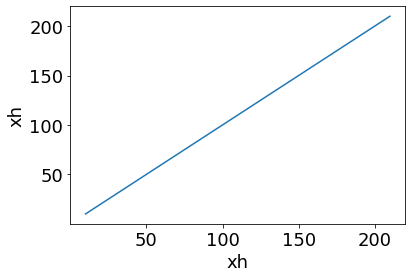

In [8]:
uconc.xh.plot()

## We will now change the x-coordinates to be in units of meters rather than degrees.

(2240, 3200)


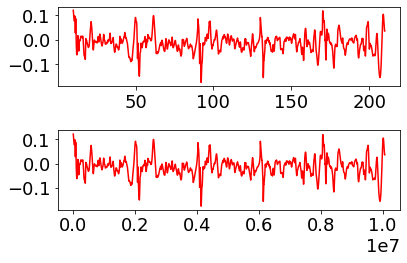

In [9]:
xi=dxconc.cumsum(axis=1)-dxconc[:,0] #subtract first dx so that we start at x=0m.
#xi=(xi-xi[:,479]) #Center the grid along the center longitude.


index=110
xline= xi[index,:]
uline= uconc[index,:]; uline=uline.assign_coords(xh=xline)
vline= vconc[index,:]; vline=vline.assign_coords(xh=xline)

print(xi.shape)

fig, ax = plt.subplots(2)
ax[0].plot(uconc[index,:].xh,uconc[index,:],'r')

ax[1].plot(xline,uline,'r')
plt.tight_layout()

In [10]:
xi.shape

(2240, 3200)

### Computing the 1D spectrum at one latitude

In [11]:

i =1440 #specifies latitude index
xline= xi[i,:]
uline= uconc[i,:]; uline=uline.assign_coords(xh=xline)
vline= vconc[i,:]; vline=vline.assign_coords(xh=xline)

Ldline= Ld[i,100:-100]; 
    
uiso2 = xrft.power_spectrum(uline,dim=['xh'], scaling="density",detrend='linear').compute() #, window='hann/hamming', detrend='linear'
viso2 = xrft.power_spectrum(vline,dim=['xh'], scaling="density",detrend='linear').compute()
ekeiso = .5*(uiso2 + viso2)
nk = int(len(ekeiso)/2.)

ekeiso=ekeiso[nk+1:]    # half of the latitude array size
wavenumber= (ekeiso.freq_xh*1e3*2*np.pi)
LD_wavenumber=(1/(Ldline/1000)).mean('xh')
ES_wavenumber=ekeiso[5:].idxmax(dim='freq_xh')*1000*2*np.pi #don't count first 3 wavenumbers

    
alt_PS=0.5*(np.abs(np.fft.rfft(uline))**2)+0.5*(np.abs(np.fft.rfft(vline))**2)
alt_PS=alt_PS/(int(len(xline)/2)**2)
alt_freq= np.fft.rfftfreq(uline.size,np.array(dx[i,100])/(1000*2*np.pi))

In [12]:
Ldline.shape

(760,)

Text(0, 0.5, '[m$^2$ s$^{-2}$]')

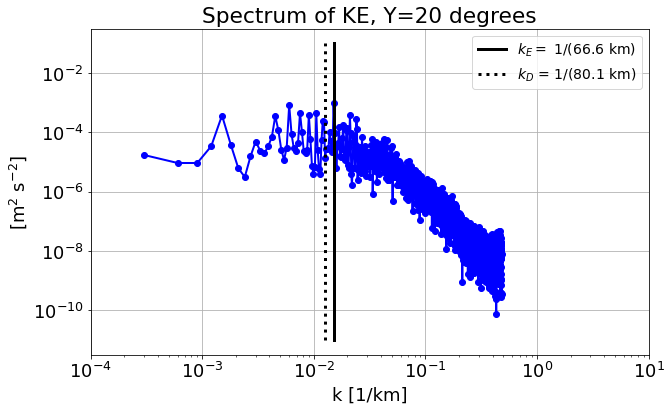

In [13]:
fig, ax = plt.subplots(figsize=(10,6))


#plt.plot(alt_freq[1:],alt_PS[1:],'-or',linewidth=2)  ### multiply 1e3 just because we want to transfer unit from cycles/m to cycles/km and 2pi to get wavenumber
plt.plot(wavenumber,ekeiso,'-ob',linewidth=2)  ### multiply 1e3 just because we want to transfer unit from cycles/m to cycles/km and 2pi to get wavenumber

l1=plt.plot([ES_wavenumber,ES_wavenumber], [1e-11,1e-1],color='k',linewidth=3,label='$k_E=$ 1/(%.1f km)'%(1/ES_wavenumber))
l2=plt.plot([LD_wavenumber,LD_wavenumber], [1e-11,1e-1],':k',linewidth=3,label='$k_D$ = 1/(%.1f km)'%(1/LD_wavenumber))
plt.xscale('log')
plt.yscale('log')
plt.title('Spectrum of KE, Y=%.0f degrees'%lat[i])
#plt.ylim([1e-5, 1e5])
plt.xlim([1e-4, 1e1])
plt.grid()
plt.xlabel('$\kappa_r (1/km)$')
plt.legend(fontsize=14)

ax.set_xlabel(r'k [1/km]')
ax.set_ylabel(r'[m$^2$ s$^{-2}$]')

In [16]:
LD_wavenumber=Ld[40:-40,0]*0.0
ES_wavenumber=Ld[40:-40,0]*0.0
ES_stdev     =Ld[40:-40,0]*0.0


for i in range(40,len(lat)-40):#,len(lat)):

    xline= xi[i]
    uline= uconc[i,:]; uline=uline.assign_coords(xh=xline) 
    vline= vconc[i,:]; vline=uline.assign_coords(xh=xline)
    Ldline= Ld[i,100:860]; Ldline=Ldline.assign_coords(xh=xline[100:860])
    
    uiso2 = xrft.power_spectrum(uline,dim=['xh'],detrend='linear',scaling="density").compute() #, window='hann/hamming', detrend='linear'
    viso2 = xrft.power_spectrum(vline,dim=['xh'],detrend='linear',scaling="density").compute()
    ekeiso = .5*(uiso2 + viso2)
    nk = int(len(ekeiso)/2.)
    ekeiso=ekeiso[nk+1:]    #460 in length, half of the used longitude array (20-940)
    
    
    ES_wavenumber[i-40]=(ekeiso[5:].idxmax(dim='freq_xh')*1000*2*np.pi) #don't count first 3 wavenumbers, compute most energetic wavenumber then average over time

    #ES_wavenumber[i-40]=(ekeiso[3:].idxmax(dim='freq_xh')*1000*2*np.pi)
    LD_wavenumber[i-40]=(1/(Ldline/1000)).mean('xh')
    wavenumber= (ekeiso.freq_xh*1e3*2*np.pi)
    
    #ES_wavenumber=ekeiso.idxmax(dim='freq_xh')*1000*2*np.pi 

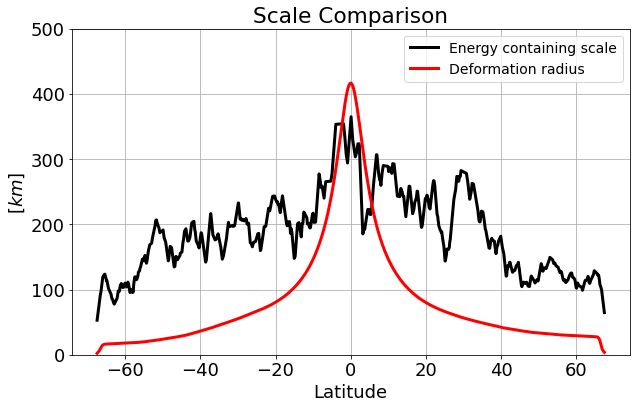

In [15]:
fig, ax = plt.subplots(figsize=(10,6))


window=50
a=np.convolve(1./ES_wavenumber, np.ones((window,))/window, mode='same')
#plt.plot(ES_wavenumber.yh,1./ES_wavenumber,'-',c='k',linewidth=3,label='Energy containing scale')
plt.plot(ES_wavenumber.yh,a,'-',c='k',linewidth=3,label='Energy containing scale')

plt.plot(LD_wavenumber.yh,1./LD_wavenumber,'-',c='r',linewidth=3,label='Deformation radius')
#plt.fill_between(ES_wavenumber.yh, 1./(ES_wavenumber)+ES_stdev, 1./(ES_wavenumber)-ES_stdev,color=(0.5,0.5,0.5,0.5))

plt.title('Scale Comparison')
plt.ylim([0, 500])
#plt.xlim([-70, 70])
plt.grid()
plt.xlabel('Latitude'); plt.ylabel('$[km]$');
plt.legend(fontsize=14)

#ax.set_xlabel(r'k [1/km]')
#ax.set_ylabel(r'[m$^3$ s$^{-2}$]')

### Computing the 1D spectrum at each latitude for all 100 times without concatenating:

In [22]:
time=np.arange(0,100,1)
xi=dx.cumsum(axis=1)-dx[:,0] #subtract first dx so that we start at x=0m.

LD_wavenumber=Ld[40:-40,0]*0.0
ES_wavenumber=Ld[40:-40,0]*0.0
ES_stdev     =Ld[40:-40,0]*0.0

LS_energy_sum=np.zeros([100,len(lat)-40*2])

boundary=100
for i in range(40,len(lat)-40):#,len(lat)):

    xline= xi[i,boundary:-boundary]
    uline= u[time,i,boundary:-boundary]; uline=uline.assign_coords(xh=xline) 
    vline= v[time,i,boundary:-boundary]; vline=uline.assign_coords(xh=xline)
    Ldline= Ld[i,boundary:-boundary]; Ldline=Ldline.assign_coords(xh=xline)
    
    uiso2 = xrft.power_spectrum(uline,dim=['xh'],detrend='linear',scaling="density").compute() #, window='hann/hamming', detrend='linear'
    viso2 = xrft.power_spectrum(vline,dim=['xh'],detrend='linear',scaling="density").compute()
    ekeiso = .5*(uiso2 + viso2)
    nk = int(len(ekeiso[1])/2.)
    ekeiso=ekeiso[:,nk+1:]    #460 in length, half of the used longitude array (20-940)
    LS_energy_sum[:,i-40]=np.nansum(ekeiso[:,0:4],axis=1)/np.nansum(ekeiso[:,0:],axis=1)
    
    ES_stdev[i-40]     =(1./(ekeiso[:,3:].idxmax(dim='freq_xh')*1000*2*np.pi)).std('time')
    ES_wavenumber[i-40]=(ekeiso[:,3:].idxmax(dim='freq_xh')*1000*2*np.pi).mean('time') #don't count first 3 wavenumbers, compute most energetic wavenumber then average over time
    ekeiso=ekeiso.mean('time')
    #ES_wavenumber[i-40]=(ekeiso[3:].idxmax(dim='freq_xh')*1000*2*np.pi)
    #LD_wavenumber[i-40]=(1/(Ldline/1000)).mean('xh')
    wavenumber = (ekeiso.freq_xh*1e3*2*np.pi)
    
    


In [23]:
print('done')

done


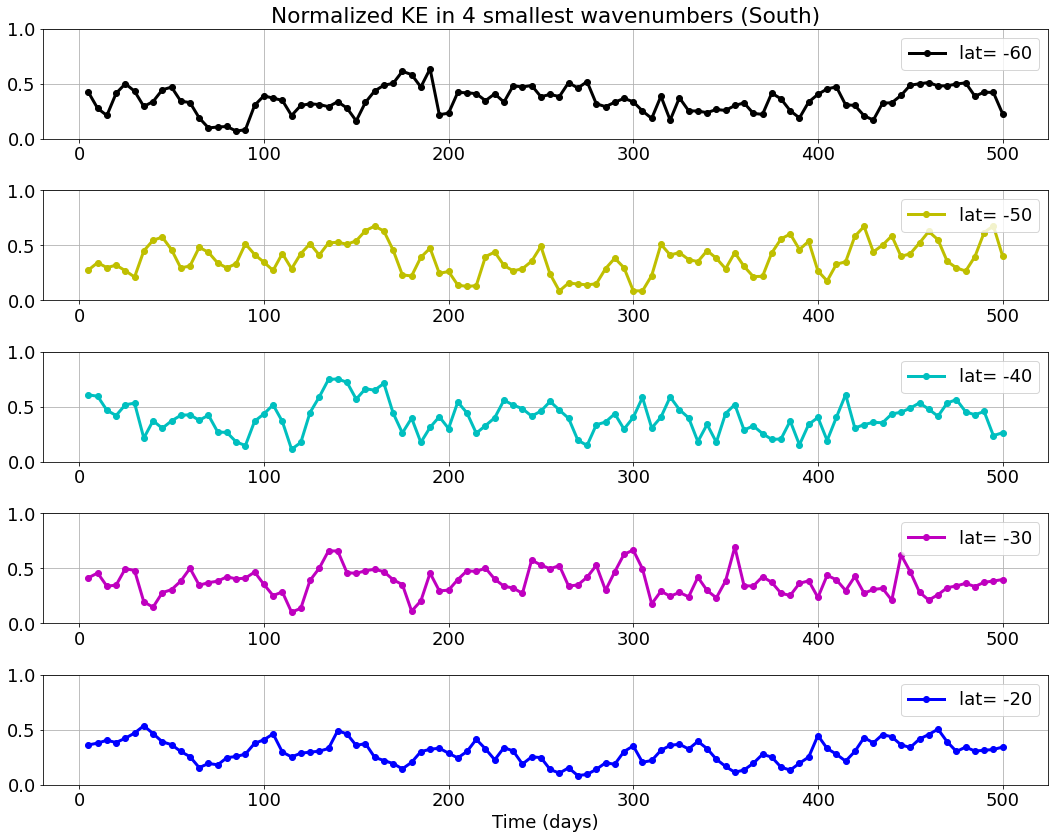

In [53]:
fig, ax = plt.subplots(5,1,figsize=(15,12))


ax[0].plot(np.arange(1,101)*5,LS_energy_sum[:,110],'-ok',linewidth=3,label='lat= %i'%LD_wavenumber.yh[110]); ax[0].grid(); ax[0].set_ylim([0, 1]); ax[0].legend()
ax[1].plot(np.arange(1,101)*5,LS_energy_sum[:,270],'-oy',linewidth=3,label='lat= %i'%LD_wavenumber.yh[270]); ax[1].grid(); ax[1].set_ylim([0, 1]); ax[1].legend(loc='upper right')
ax[2].plot(np.arange(1,101)*5,LS_energy_sum[:,430],'-oc',linewidth=3,label='lat= %i'%LD_wavenumber.yh[430]); ax[2].grid(); ax[2].set_ylim([0, 1]); ax[2].legend()
ax[3].plot(np.arange(1,101)*5,LS_energy_sum[:,590],'-om',linewidth=3,label='lat= %i'%LD_wavenumber.yh[590]); ax[3].grid(); ax[3].set_ylim([0, 1]); ax[3].legend()
ax[4].plot(np.arange(1,101)*5,LS_energy_sum[:,750],'-ob',linewidth=3,label='lat= %i'%LD_wavenumber.yh[750]); ax[4].grid(); ax[4].set_ylim([0, 1]); ax[4].legend()

#plt.yscale('log')

ax[0].set_title('Normalized KE in 4 smallest wavenumbers (South)'); plt.grid()
plt.ylim([0, 1])
#plt.xlim([1e-3, 1e1])
plt.grid()
plt.xlabel('Time (days)')


#plt.set_ylabel(r'[m$^2$ s$^{-2}$]')
plt.tight_layout()

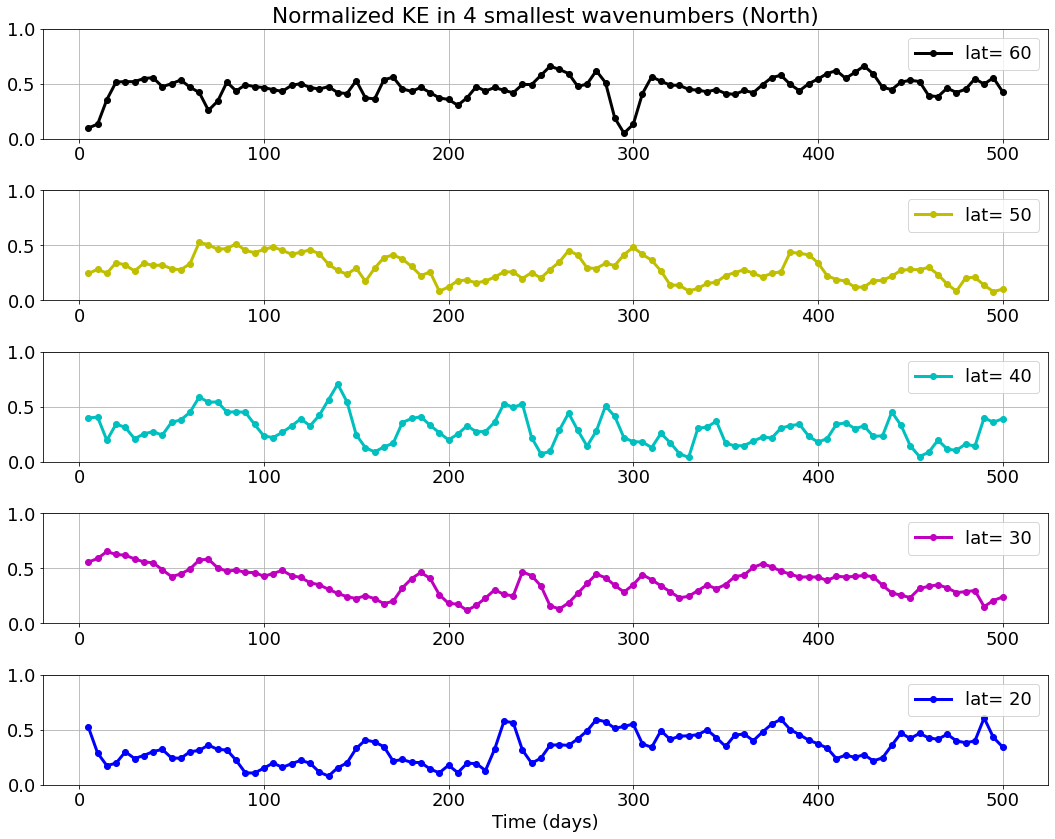

In [51]:
fig, ax = plt.subplots(5,1,figsize=(15,12))


ax[0].plot(np.arange(1,101)*5,LS_energy_sum[:,2050],'-ok',linewidth=3,label='lat= %i'%LD_wavenumber.yh[2050]); ax[0].grid(); ax[0].set_ylim([0, 1]); ax[0].legend()
ax[1].plot(np.arange(1,101)*5,LS_energy_sum[:,1890],'-oy',linewidth=3,label='lat= %i'%LD_wavenumber.yh[1890]); ax[1].grid(); ax[1].set_ylim([0, 1]); ax[1].legend()
ax[2].plot(np.arange(1,101)*5,LS_energy_sum[:,1730],'-oc',linewidth=3,label='lat= %i'%LD_wavenumber.yh[1730]); ax[2].grid(); ax[2].set_ylim([0, 1]); ax[2].legend()
ax[3].plot(np.arange(1,101)*5,LS_energy_sum[:,1570],'-om',linewidth=3,label='lat= %i'%LD_wavenumber.yh[1570]); ax[3].grid(); ax[3].set_ylim([0, 1]); ax[3].legend()
ax[4].plot(np.arange(1,101)*5,LS_energy_sum[:,1410],'-ob',linewidth=3,label='lat= %i'%LD_wavenumber.yh[1410]); ax[4].grid(); ax[4].set_ylim([0, 1]); ax[4].legend()

#plt.yscale('log')

ax[0].set_title('Normalized KE in 4 smallest wavenumbers (North)'); plt.grid()
plt.ylim([0, 1])
#plt.xlim([1e-3, 1e1])
plt.grid()
plt.xlabel('Time (days)')


#plt.set_ylabel(r'[m$^2$ s$^{-2}$]')
plt.tight_layout()

Text(0, 0.5, '[m$^2$ s$^{-2}$]')

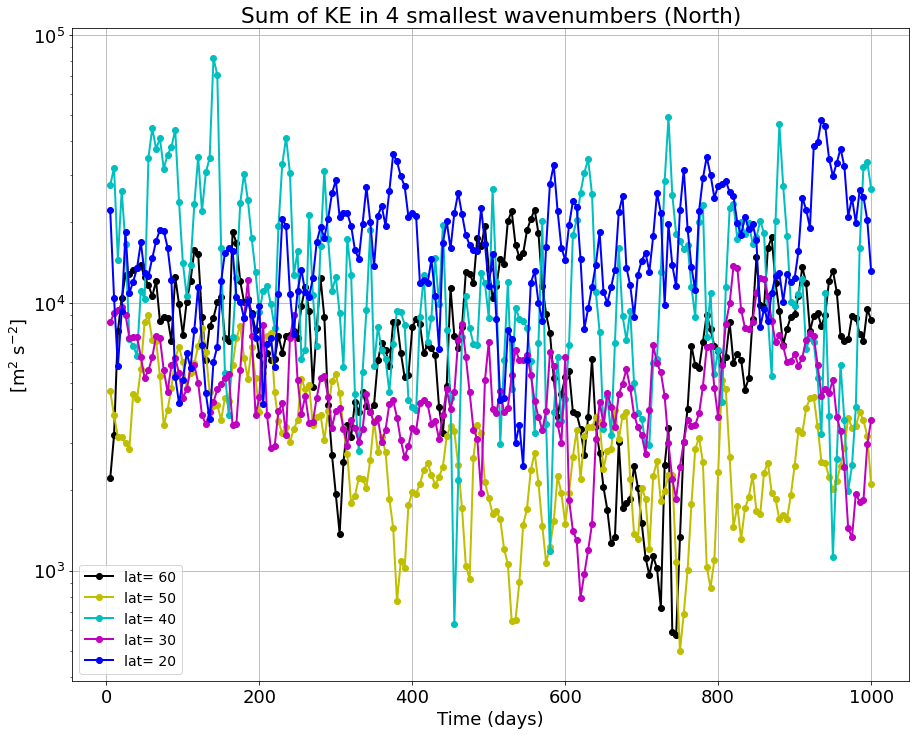

In [111]:
fig, ax = plt.subplots(figsize=(15,12))


plt.plot(np.arange(1,201)*5,LS_energy_sum[:,2050],'-ok',linewidth=2,label='lat= %i'%LD_wavenumber.yh[2050])
plt.plot(np.arange(1,201)*5,LS_energy_sum[:,1890],'-oy',linewidth=2,label='lat= %i'%LD_wavenumber.yh[1890])
plt.plot(np.arange(1,201)*5,LS_energy_sum[:,1730],'-oc',linewidth=2,label='lat= %i'%LD_wavenumber.yh[1730])
plt.plot(np.arange(1,201)*5,LS_energy_sum[:,1570],'-om',linewidth=2,label='lat= %i'%LD_wavenumber.yh[1570])
plt.plot(np.arange(1,201)*5,LS_energy_sum[:,1410],'-ob',linewidth=2,label='lat= %i'%LD_wavenumber.yh[1410])

plt.yscale('log')

plt.title('Sum of KE in 4 smallest wavenumbers (North)')
#plt.ylim([1e-5, 1e5])
#plt.xlim([1e-3, 1e1])
plt.grid()
plt.xlabel('Time (days)')
plt.legend(fontsize=14)

ax.set_ylabel(r'[m$^2$ s$^{-2}$]')

In [ ]:
LS_energy_sum.shape